# **5.  SARIMA(Seasonal Autoregressive Integrated Moving Average)**

In [ ]:
# import required libraries. 
!pip install pmdarima
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib
import pmdarima as pm

     |████████████████████████████████| 1.4 MB 5.1 MB/s 
     |████████████████████████████████| 9.5 MB 31.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
ethereum = pd.read_csv('/content/drive/MyDrive/ETH_USD_2015-08-09_2021-08-11-CoinDesk.csv')
print(ethereum.head(5)) 

  Currency        Date  ...  24h High (USD)  24h Low (USD)
0      ETH  2015-08-09  ...        1.916540       0.794497
1      ETH  2015-08-10  ...        0.909046       0.692321
2      ETH  2015-08-11  ...        0.692321       0.654331
3      ETH  2015-08-12  ...        1.148621       0.668067
4      ETH  2015-08-13  ...        1.266023       0.850151

[5 rows x 6 columns]


In [ ]:
ethereum.rename(columns={'Closing Price (USD)': 'closing_price'}, inplace=True)
ethereum.rename(columns={'24h Open (USD)': 'open'}, inplace=True)
ethereum.rename(columns={'24h High (USD)': 'high'}, inplace=True)
ethereum.rename(columns={'24h Low (USD)': 'low'}, inplace=True)

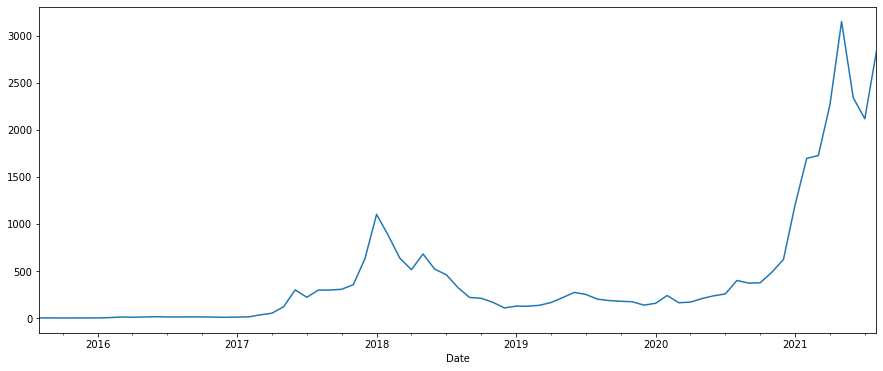

In [ ]:
ethereum['Date'] = ethereum['Date'].astype('datetime64[s]')
ethereum = ethereum.set_index('Date')
ethereum_avg = ethereum['closing_price'].resample('MS').mean()
ethereum_avg.plot(figsize = (15, 6))
plt.show()

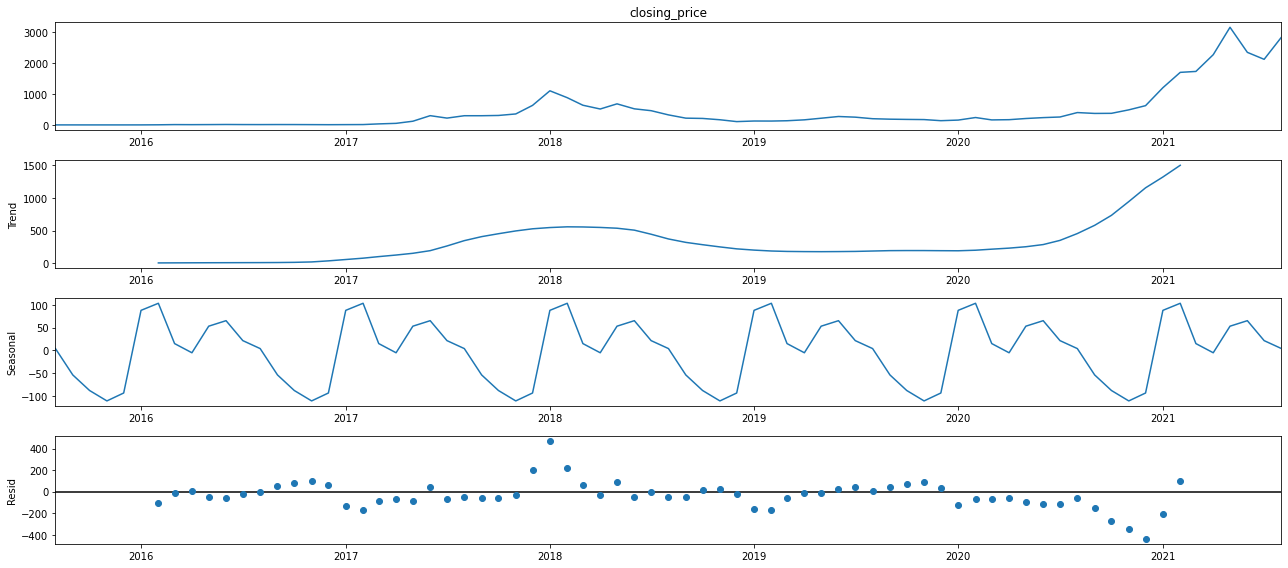

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(ethereum_avg, model='additive')
fig = decomposition.plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag= "AIC")
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

print(adf_test(ethereum_avg))

Results of Dickey-Fuller Test:
Test Statistic                 -1.365384
p-value                         0.598754
#Lags Used                      3.000000
Number of Observations Used    69.000000
Critical Value (1%)            -3.528890
Critical Value (5%)            -2.904440
Critical Value (10%)           -2.589656
dtype: float64
None


Results of Dickey-Fuller Test:
Test Statistic                 -1.365384
p-value                         0.598754
#Lags Used                      3.000000
Number of Observations Used    69.000000
Critical Value (1%)            -3.528890
Critical Value (5%)            -2.904440
Critical Value (10%)           -2.589656
dtype: float64
None


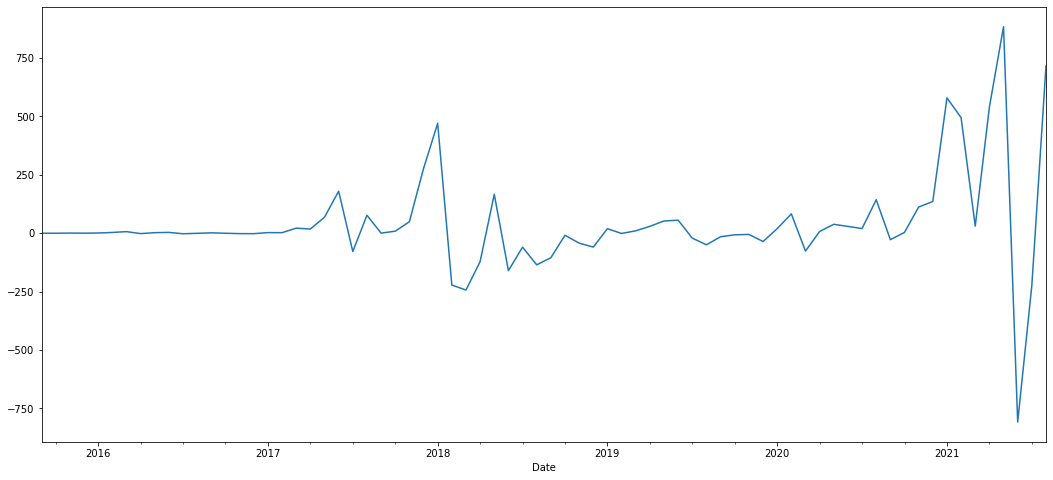

In [ ]:
ETH_adj = ethereum_avg - ethereum_avg.shift(1)
ETH_adj = ETH_adj.dropna()
ETH_adj.plot()

print(adf_test(ethereum_avg))

Results of Dickey-Fuller Test:
Test Statistic                 -1.365384
p-value                         0.598754
#Lags Used                      3.000000
Number of Observations Used    69.000000
Critical Value (1%)            -3.528890
Critical Value (5%)            -2.904440
Critical Value (10%)           -2.589656
dtype: float64
None


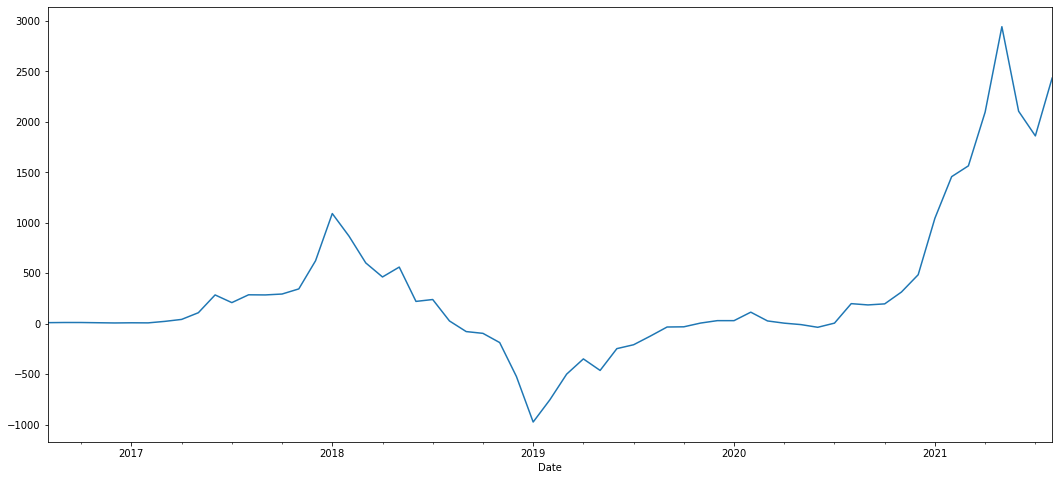

In [ ]:
ETH_adj = ethereum_avg - ethereum_avg.shift(12)
ETH_adj = ETH_adj.dropna()
ETH_adj.plot()

print(adf_test(ethereum_avg))

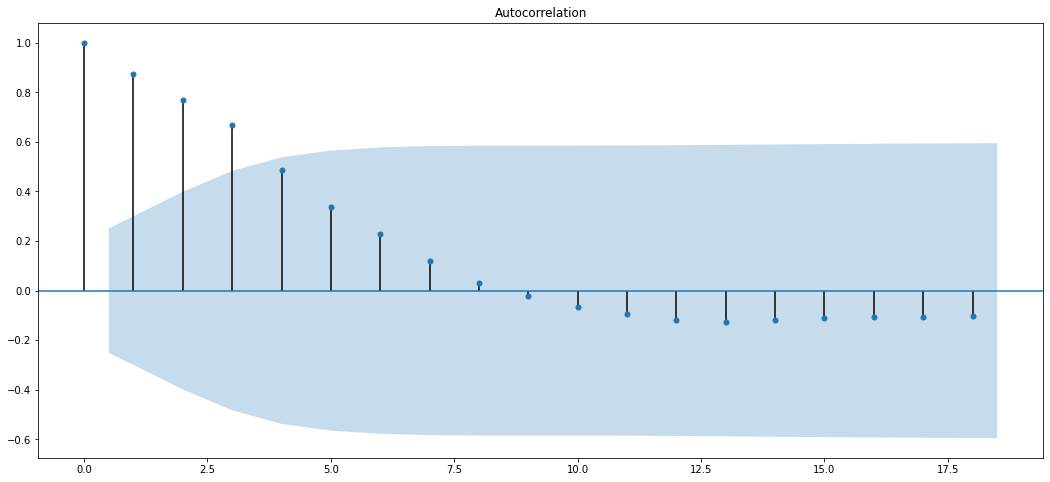

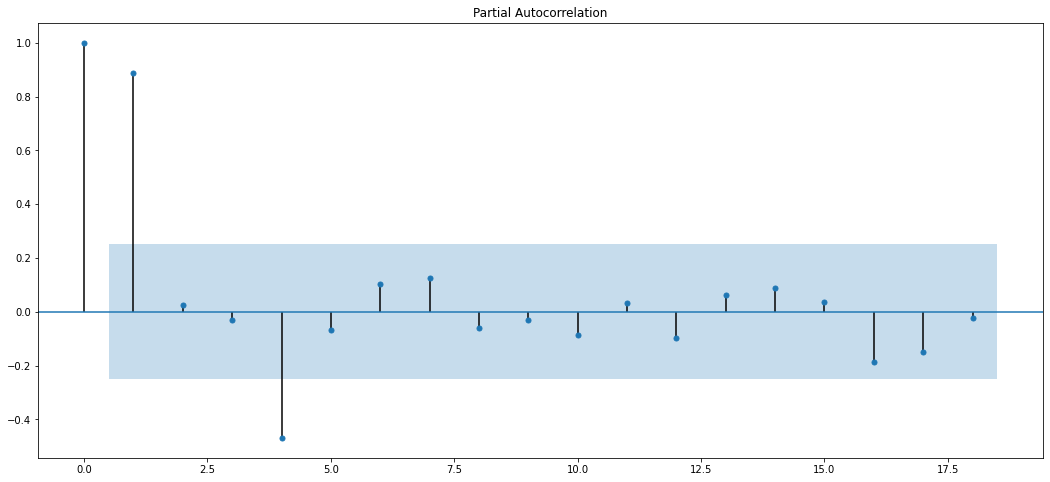

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ETH_adj)
matplotlib.pyplot.show()
plot_pacf(ETH_adj)
matplotlib.pyplot.show()

In [ ]:
p = range(0, 3)
d = range(1,2)
q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 1, 1) x (0, 1, 1, 12)
SARIMAX: (0, 1, 1) x (0, 1, 2, 12)
SARIMAX: (0, 1, 2) x (1, 1, 0, 12)
SARIMAX: (0, 1, 2) x (1, 1, 1, 12)


In [ ]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(ethereum['closing_price'],order=(3, 1, 3),seasonal_order=(1,1,1,12))
results=model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


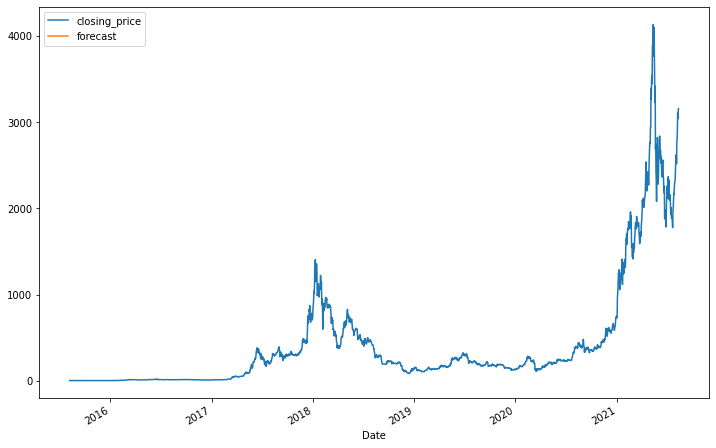

In [ ]:
ethereum['forecast']=results.predict(start=2000,end=2500,dynamic=True)
ethereum[['closing_price','forecast']].plot(figsize=(12,8))

In [ ]:
print(ethereum['forecast'])

Date
2015-08-09   NaN
2015-08-10   NaN
2015-08-11   NaN
2015-08-12   NaN
2015-08-13   NaN
              ..
2021-08-07   NaN
2021-08-08   NaN
2021-08-09   NaN
2021-08-10   NaN
2021-08-11   NaN
Name: forecast, Length: 2162, dtype: float64


In [ ]:
from pandas.tseries.offsets import DateOffset
pred_date=[ethereum.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [ ]:
pred_date=pd.DataFrame(index=pred_date[1:],columns=ethereum.columns)
pred_date

,Currency,closing_price,open,high,low,forecast
2021-09-11,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-11,NaN,NaN,NaN,NaN,NaN,NaN
2021-11-11,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-11,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-11,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-11,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-11,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-11,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-11,NaN,NaN,NaN,NaN,NaN,NaN
2022-06-11,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data=pd.concat([ethereum,pred_date])

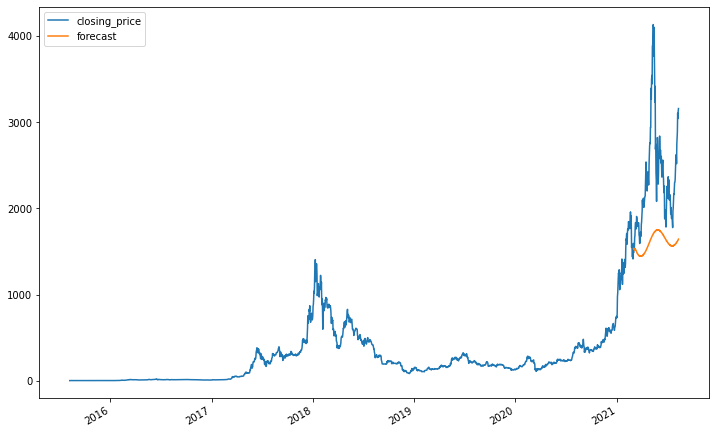

In [ ]:
data['forecast'] = results.predict(start = 2000, end = 2161, dynamic= True)  
data[['closing_price', 'forecast']].plot(figsize=(12, 8))